# Underlight Computation analog to 6SV

In [1]:
import numpy as np
import drjit as dr
import mitsuba as mi
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

mi.set_variant("llvm_ad_rgb")

In [14]:
wavelengths = np.arange(400, 705, 5)
att_coeff_k = np.array([
    0.0209, 0.0200, 0.0196, 0.0189, 0.0183,
    0.0182, 0.0171, 0.0170, 0.0168, 0.0166,
    0.0168, 0.0170, 0.0173, 0.0174, 0.0175,
    0.0184, 0.0194, 0.0203, 0.0217, 0.0240,
    0.0271, 0.0320, 0.0384, 0.0445, 0.0490,
    0.0505, 0.0518, 0.0543, 0.0568, 0.0615,
    0.0640, 0.0640, 0.0717, 0.0762, 0.0807,
    0.0940, 0.1070, 0.1280, 0.1570, 0.2000,
    0.2530, 0.2790, 0.2960, 0.3030, 0.3100,
    0.3150, 0.3200, 0.3250, 0.3300, 0.3400,
    0.3500, 0.3700, 0.4050, 0.4180, 0.4300,
    0.4400, 0.4500, 0.4700, 0.5000, 0.5500,
    0.6500
])
att_coeff_chi = np.array([
    0.1100, 0.1110, 0.1125, 0.1135, 0.1126,
    0.1104, 0.1078, 0.1065, 0.1041, 0.0996,
    0.0971, 0.0939, 0.0896, 0.0859, 0.0823,
    0.0788, 0.0746, 0.0726, 0.0690, 0.0660,
    0.0636, 0.0600, 0.0578, 0.0540, 0.0498,
    0.0475, 0.0467, 0.0450, 0.0440, 0.0426,
    0.0410, 0.0400, 0.0390, 0.0375, 0.0360,
    0.0340, 0.0330, 0.0328, 0.0325, 0.0330,
    0.0340, 0.0350, 0.0360, 0.0375, 0.0385,
    0.0400, 0.0420, 0.0430, 0.0440, 0.0445,
    0.0450, 0.0460, 0.0475, 0.0490, 0.0515,
    0.0520, 0.0505, 0.0440, 0.0390, 0.0340,
    0.0300
])
att_coeff_e = np.array([
    0.668, 0.672, 0.680, 0.687, 0.693,
    0.701, 0.707, 0.708, 0.707, 0.704,
    0.701, 0.699, 0.700, 0.703, 0.703,
    0.703, 0.703, 0.704, 0.702, 0.700,
    0.700, 0.695, 0.690, 0.685, 0.680,
    0.675, 0.670, 0.665, 0.660, 0.655,
    0.650, 0.645, 0.640, 0.630, 0.623,
    0.615, 0.610, 0.614, 0.618, 0.622,
    0.626, 0.630, 0.634, 0.638, 0.642,
    0.647, 0.653, 0.658, 0.663, 0.667,
    0.672, 0.677, 0.682, 0.687, 0.695,
    0.697, 0.693, 0.665, 0.640, 0.620,
    0.600
])

molecular_scatttering_coeff_6s = np.array([
    0.0076, 0.0072, 0.0068, 0.0064, 0.0061,
    0.0058, 0.0055, 0.0052, 0.0049, 0.0047,
    0.0045, 0.0043, 0.0041, 0.0039, 0.0037,
    0.0036, 0.0034, 0.0033, 0.0031, 0.0030,
    0.0029, 0.0027, 0.0026, 0.0025, 0.0024,
    0.0023, 0.0022, 0.0022, 0.0021, 0.0020,
    0.0019, 0.0018, 0.0018, 0.0017, 0.0017,
    0.0016, 0.0016, 0.0015, 0.0015, 0.0014,
    0.0014, 0.0013, 0.0013, 0.0012, 0.0012,
    0.0011, 0.0011, 0.0010, 0.0010, 0.0010,
    0.0010, 0.0009, 0.0008, 0.0008, 0.0008,
    0.0007, 0.0007, 0.0007, 0.0007, 0.0007,
    0.0007
])

molecular_scatttering_coeff_morel = np.array([
    0.00618095, 0.00578095,
    0.00547619, 0.00517619, 0.00492222, 0.0046746 , 0.00447143,
    0.00426825, 0.00406508, 0.0038619 , 0.00365873, 0.00346667,
    0.00331429, 0.0031619 , 0.00300952, 0.00287143, 0.00276984,
    0.00265238, 0.0025    , 0.00236508, 0.00226349, 0.0021619 ,
    0.00206032, 0.00195873, 0.00185714, 0.00177778, 0.00172698,
    0.00167619, 0.0016254 , 0.0015746 , 0.00152381, 0.00144603,
    0.00134444, 0.0013    , 0.0013    , 0.00126984, 0.00121905,
    0.00116825, 0.00111746, 0.00107   , 0.00102429, 0.00098556,
    0.00095   , 0.0009181 , 0.00088762, 0.00085714, 0.00082667,
    0.00079619, 0.00076571, 0.00073937, 0.00071397, 0.00069286,
    0.00067254, 0.00065222, 0.0006319 , 0.00061159, 0.00059127,
    0.00057095, 0.00055063, 0.00053524, 0.00052
])

ior_wavelengths = [ 0.200, 0.225, 0.250, 0.275, 0.300, 0.325, 0.345 ,0.375, 0.400, 0.425 ,
                    0.445, 0.475, 0.500, 0.525, 0.550, 0.575, 0.600, 0.625, 0.650, 0.675,
                    0.700, 0.725, 0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900, 0.925,
                    0.950, 0.975, 1.000, 1.200, 1.400, 1.600, 1.800, 2.000, 2.200, 2.400, 
                    2.600, 2.650, 2.700, 2.750, 2.800, 2.850, 2.900, 2.950, 3.000, 3.050,
                    3.100, 3.150, 3.200, 3.250, 3.300, 3.350, 3.400, 3.450, 3.500, 3.600,
                    3.700, 3.800, 3.900, 4.000 ]
ior_real_data = [   1.369, 1.373, 1.362, 1.354, 1.349, 1.346, 1.343, 1.341, 1.339, 1.338,
                    1.337, 1.336, 1.335, 1.334, 1.333, 1.333, 1.332, 1.332, 1.331, 1.331,
                    1.331, 1.330, 1.330, 1.330, 1.329, 1.329, 1.329, 1.328, 1.328, 1.328, 
                    1.327, 1.327, 1.327, 1.324, 1.321, 1.317, 1.312, 1.306, 1.296, 1.279,
                    1.242, 1.219, 1.188, 1.157, 1.142, 1.149, 1.201, 1.292, 1.371, 1.426,
                    1.467, 1.483, 1.478, 1.467, 1.450, 1.432, 1.420, 1.410, 1.400, 1.385,
                    1.374, 1.364, 1.357, 1.351 ]


61 61


In [3]:
def cos(x):
    return np.cos(x)

def sin(x): 
    return np.sin(x)

def rnd(x, decimals=8):
    return round(x, decimals)

def friedman_sverdrup(chlorinity):
    return 0.00017492711 * (0.03 + 1.805 * chlorinity)

def fresnel(nr, ni, coschi, sinchi):
    a1 = np.abs(nr * nr - ni * ni - sinchi * sinchi)
    a2 = np.sqrt((nr * nr - ni * ni - sinchi * sinchi) ** 2 + 4 * nr * nr * ni * ni)
    u = np.sqrt(0.5 * np.abs(a1 + a2))
    v = np.sqrt(0.5 * np.abs(-a1 + a2))
    Rr2 = ((coschi - u) ** 2 + v * v) / ((coschi + u) ** 2 + v * v)
    b1 = (nr * nr - ni * ni) * coschi
    b2 = 2 * nr * ni * coschi
    Rl2 = ((b1 - u) ** 2 + (b2 + v) ** 2) / ((b1 + u) ** 2 + (b2 - v) ** 2)
    R1 = (Rr2 + Rl2) / 2.0
    return R1

def cox_munk(phw, zx, zy, wspd):
    sigmaC = 0.003 + 0.00192 * wspd
    sigmaU = 0.00316 * wspd
    C21 = 0.01 - 0.0086 * wspd
    C03 = 0.04 - 0.033 * wspd
    C40 = 0.40
    C22 = 0.12
    C04 = 0.23
    xe = (rnd(cos(phw)) * zx + rnd(sin(phw)) * zy) / np.sqrt(sigmaC)
    xn = (-rnd(sin(phw)) * zx + rnd(cos(phw)) * zy) / np.sqrt(sigmaU)
    xe2 = xe * xe
    xn2 = xn * xn
    coef = 1.0 - (C21 / 2.0) * (xe2 - 1.0) * xn - (C03 / 6.0) * (xn2 - 3) * xn
    coef = coef + (C40 / 24.0) * (xe2 * xe2 - 6.0 * xe2 + 3.0)
    coef = coef + (C04 / 24.0) * (xn2 * xn2 - 6.0 * xn2 + 3.0)
    coef = coef + (C22 / 4.0) * (xe2 - 1.0) * (xn2 - 1.0)
    prob = coef / 2.0 / np.pi / np.sqrt(sigmaU) / np.sqrt(sigmaC) * np.exp(-(xe2 + xn2) / 2.0)
    return prob

def sunglint(to, ti, po, pi, pu, wspd, nr, ni, chlor):
    phi = pi - po
    phw = pi - pu
    cs = rnd(cos(ti))
    cv = rnd(cos(np.pi / 2 - to))
    ss = rnd(sin(ti))
    sv = rnd(sin(np.pi / 2 - to))
    zx = -sv * rnd(sin(phi)) / (cs + cv)
    zy = (ss + sv * rnd(cos(phi))) / (cs + cv)

    # Tilt
    tan_tilt = np.sqrt(zx * zx + zy * zy)
    tilt = np.arctan(tan_tilt)

    # Cox Munk term
    specular_prob = cox_munk(phw, zx, zy, wspd)
    
    # Fresnel term
    cos2chi = cv * cs + sv * ss * cos(phi)
    
    if cos2chi > 1.0:
        cos2chi = 0.999999999
    elif cos2chi < -1.0:
        cos2chi = -0.999999999
    coschi = np.sqrt(0.5 * (1.0 + cos2chi))
    sinchi = np.sqrt(0.5 * (1.0 - cos2chi))
    if coschi > 1.0:
        coschi = 0.999999999
    elif coschi < -1.0:
        coschi = -0.999999999
    if sinchi > 1.0:
        sinchi = 0.999999999
    elif sinchi < -1.0:
        sinchi = -0.999999999

    nr_corr = nr + friedman_sverdrup(chlor)
    R = fresnel(nr_corr, ni, coschi, sinchi)
    reflectance = (np.pi * specular_prob * R) / (4.0 * cs * cv * cos(tilt) ** 4)

    # Reflectance of sun glint
    return specular_prob, R, tilt, cs, cv, reflectance

# Wavelength in namometers
def backscatter_ratio(pigmentation, wavelength):
    return 2e-3 + 2e-2 * (0.5 - 0.25 * np.log(pigmentation)) * (550.0 / wavelength)

def scattering_coefficient(pigmentation):
    return 0.30 * np.power(pigmentation, 0.62);

def backscattering_coefficient(pigmentation, wavelength, morel=False):
    molecular_scatter_coeff = 0.0
    if morel:
        molecular_scatter_coeff = np.interp(wavelength, wavelengths, molecular_scatttering_coeff_morel)
    else:
        molecular_scatter_coeff = np.interp(wavelength, wavelengths, molecular_scatttering_coeff_6s)
    scattering_coeff = scattering_coefficient(pigmentation)
    backscatter_rat = backscatter_ratio(pigmentation, wavelength)
    return 0.5 * molecular_scatter_coeff + scattering_coeff * backscatter_rat

def diffuse_attenuation_coefficient(wavelength, pigmentation):
    # Interpolate wavelength for k, chi and e
    k = np.interp(wavelength, wavelengths, att_coeff_k)
    chi = np.interp(wavelength, wavelengths, att_coeff_chi)
    e = np.interp(wavelength, wavelengths, att_coeff_e)
    return k + chi * np.power(pigmentation, e)

def up_down_ratio(wavelenght, pigmentation, morel=False):
    backscatter_coeff = backscattering_coefficient(pigmentation, wavelenght, morel=morel)
    diffuse_attenuation_coeff = diffuse_attenuation_coefficient(wavelenght, pigmentation)
    u = 0.75
    r_omega = 0.33 * backscatter_coeff / (u * diffuse_attenuation_coeff)

    def stop_criterion(current, previous):
        return np.abs((current - previous) / current) < 1e-3
    
    while True:
        # Update U
        u = (0.9 * (1.0 - r_omega)) / (1.0 + 2.25 * r_omega)

        # Update R
        r_omega_prev = r_omega
        r_omega = 0.33 * backscatter_coeff / (u * diffuse_attenuation_coeff)
        if stop_criterion(r_omega, r_omega_prev):
            break

    return r_omega

def hemisphere_quadrature():
    pi = np.pi

    # 24 x 48 point Gauss quadrature
    azimuth_pts, azimuth_weights = np.polynomial.legendre.leggauss(48)  # Azimuth
    zenith_pts, zenith_weights = np.polynomial.legendre.leggauss(24)    # Zenith

    # Transformation of the azimuth: x = π(t + 1)       [-1, 1] => [0, 2π]
    # Transform of the zenith: x = (π / 4)(t + 1)       [-1, 1] => [0, π/2]
    transformed_azimuths = pi * (azimuth_pts + 1)
    transformed_zeniths = (pi / 4) * (zenith_pts + 1)

    # Create 2D points
    points = np.array([[x, y] for x in transformed_azimuths for y in transformed_zeniths])

    # Create weights (and don't forget the Jacobian)
    jacobian = (pi ** 2) / 4.0
    weights = np.array([wx * wy for wx in azimuth_weights for wy in zenith_weights]) * jacobian

    # Round all points and weights
    points = [[round(x, 8), round(y, 8)] for x, y in points]
    weights = [round(w, 8) for w in weights]

    return points, weights

def downwelling_transmittance(ti, pi, pu, wspd, nr, ni, chlor):
    # Downwelling transmittance
    o_d = 0.0

    # Quadrature points and weights
    points, weights = hemisphere_quadrature()

    # The function to integrate
    def f(po, to):
        cos_to = rnd(cos(to))
        sin_to = rnd(sin(to))

        spec, R, tilt, alpha, beta, ref = sunglint(to, ti, po, pi, pu, wspd, nr, ni, chlor)
        reflectance = (np.pi * spec * R) / (4.0 * alpha * beta * np.cos(tilt) ** 4)
        return reflectance * cos_to * sin_to
    
    # Evaluate the integral using the quadrature points and weights
    values = np.array([f(*p) for p in points])
    o_d = np.dot(values, weights)

    # Transmittance = 1 - opacity
    return 1 - o_d

def upwelling_transmittance(to, po, pu, wspd, nr, ni, chlor):
    # Upwelling transmittance
    o_u = 0.0

    # Quadrature points and weights
    points, weights = hemisphere_quadrature()
    
    # The function to integrate
    def f(pi, ti):
        cos_ti = rnd(cos(ti))
        sin_ti = rnd(sin(ti))

        spec, R, tilt, alpha, beta, ref = sunglint(to, ti, po, pi, pu, wspd, nr, ni, chlor)
        reflectance = (np.pi * spec * R) / (4.0 * alpha * beta * np.cos(tilt) ** 4)
        
        return reflectance, cos_ti * sin_ti
        
    # Evaluate the integral using the quadrature points and weights
    values = np.array([f(*p) for p in points])
    reflectances = values[:, 0]
    cos_sin = values[:, 1]
    o_u = np.dot(reflectances * cos_sin, weights)


    # Transmittance = 1 - opacity
    return 1 - o_u #(o_u / np.dot(cos_sin, weights))


def underlight(to, ti, po, pi, pu, wspd, n_real, n_imag, wavelength, pigmentation, chlorinity):
    # According to Vermote & Kotchenova
    if (wavelength < 400 or wavelength > 700):
        return 0.0

    alpha = 0.485
    r_omega = up_down_ratio(wavelength, pigmentation, chlorinity)

    t_d = 0.96 #downwelling_transmittance(ti, pi, pu, wspd, n_real, n_imag, chlorinity)
    t_u = 0.90 #upwelling_transmittance(to, po, pu, wspd, n_real, n_imag, chlorinity)

    # Return the underlight
    return (1.0 / (n_real**2 + n_imag**2)) * (r_omega * t_d * t_u) / (1.0 - alpha * r_omega)


In [4]:
def downwelling_transmittance_alt(ti, pi, pu, wspd, nr, ni, chlor):
    # 24 x 48 point Gauss quadrature
    azimuth_pts, azimuth_weights = np.polynomial.legendre.leggauss(48)  # Azimuth
    zenith_pts, zenith_weights = np.polynomial.legendre.leggauss(24)    # Zenith
    
    # Transformation of the azimuth: x = π(t + 1)       [-1, 1] => [0, 2π]
    # Transform of the zenith: x = (π / 4)(t + 1)       [-1, 1] => [0, π/2]
    transformed_azimuths = np.pi * (azimuth_pts + 1)
    transformed_zeniths = (np.pi / 4) * (zenith_pts + 1)

    # The function to integrate
    def f(theta_d, phi_d):
        spec, R, tilt, alpha, beta, ref = sunglint(theta_d, ti, phi_d, pi, pu, wspd, nr, ni, chlor)
        reflectance = (np.pi * spec * R) / (4.0 * alpha * beta * np.cos(tilt) ** 4)
        
        return reflectance
        
    tds = 0
    summ = 0
    for i in range(len(transformed_azimuths)):
        for j in range(len(transformed_zeniths)):
            theta_d = transformed_zeniths[j]
            phi_d = transformed_azimuths[i]
            cos_theta_d = rnd(cos(theta_d))
            sin_theta_d = rnd(sin(theta_d))
            reflectance = f(theta_d, phi_d)
            pond = cos_theta_d * sin_theta_d * azimuth_weights[i] * zenith_weights[j]
            summ = summ + pond
            tds = tds + reflectance * pond
    return 1.0 - tds / summ


def upwelling_transmittance_alt(to, po, pu, wspd, nr, ni, chlor):
    # 24 x 48 point Gauss quadrature
    azimuth_pts, azimuth_weights = np.polynomial.legendre.leggauss(48)  # Azimuth
    zenith_pts, zenith_weights = np.polynomial.legendre.leggauss(24)    # Zenith
    
    # Transformation of the azimuth: x = π(t + 1)       [-1, 1] => [0, 2π]
    # Transform of the zenith: x = (π / 4)(t + 1)       [-1, 1] => [0, π/2]
    transformed_azimuths = np.pi * (azimuth_pts + 1)
    transformed_zeniths = (np.pi / 4) * (zenith_pts + 1)

    # The function to integrate
    def f(theta_d, phi_d):
        spec, R, tilt, alpha, beta, ref = sunglint(to, theta_d, po, phi_d, pu, wspd, nr, ni, chlor)
        reflectance = (np.pi * spec * R) / (4.0 * alpha * beta * np.cos(tilt) ** 4)
        
        return reflectance
        
    tdv = 0
    summ = 0
    for i in range(len(transformed_azimuths)):
        for j in range(len(transformed_zeniths)):
            theta_d = transformed_zeniths[j]
            phi_d = transformed_azimuths[i]
            cos_theta_d = rnd(cos(theta_d))
            sin_theta_d = rnd(sin(theta_d))
            reflectance = f(theta_d, phi_d)
            pond = cos_theta_d * sin_theta_d * azimuth_weights[i] * zenith_weights[j]
            summ = summ + pond
            tdv = tdv + reflectance * pond
    return 1.0 - tdv / summ

In [5]:
# Some parameters for the test case
#   Sun angle
azim_s = 0.0

#   Wind speed and direction
wind_speed = 10
azim_w = 0.0

#   Water properties (IOR and chlorinity)
n_real = 1.333
n_imag = 0.0
chlorinity = 19

#   Variable sensor position
res = 25
azim_vs = np.linspace(0, 2 * np.pi, 2 * res)
zen_vs = np.linspace(np.deg2rad(1), np.deg2rad(89), res)
    

In [6]:
# Test upwelling transmittance
azimuth = 0.0
zeniths = np.linspace(np.deg2rad(1), np.deg2rad(89), 89)
#zeniths = np.linspace(0, 2, 1)

wind_speed = 2
wind_direction = 0.0

n_real = 1.333
n_imag = 0.0

chlorinity = 19

results_up = {}
results_down = {}
for zenith in zeniths:
    t_u = upwelling_transmittance_alt(zenith, azimuth, wind_direction, wind_speed, 1 / n_real, 0, chlorinity)
    t_d = downwelling_transmittance_alt(zenith, azimuth, wind_direction, wind_speed, n_real, n_imag, chlorinity)
    results_up[zenith] = t_u
    results_down[zenith] = t_d


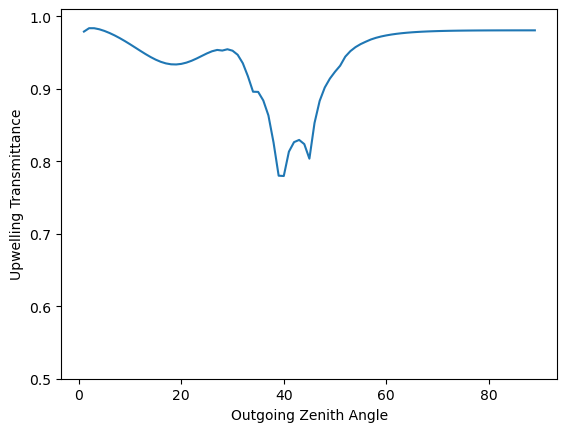

In [7]:
# Visualize the upwelling transmittance
fig, ax = plt.subplots()
keys = list(results_down.keys())
keys_in_deg = np.rad2deg(keys)
ax.plot(keys_in_deg, list(results_up.values()), label="Upwelling")

ax.set_xlabel("Outgoing Zenith Angle")
ax.set_ylabel("Upwelling Transmittance")

# Set y-limits
plt.ylim(0.5, 1.01)

plt.show()

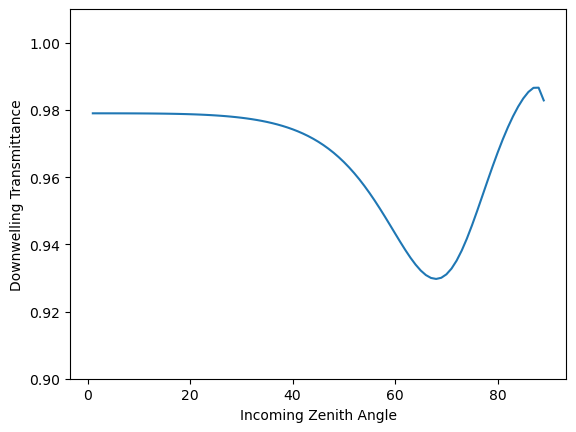

In [8]:
# Visualize the downwelling transmittance
fig, ax = plt.subplots()
keys = list(results_down.keys())
keys_in_deg = np.rad2deg(keys)
ax.plot(keys_in_deg, list(results_down.values()), label="Downwelling")

ax.set_xlabel("Incoming Zenith Angle")
ax.set_ylabel("Downwelling Transmittance")

# Set y-limits
plt.ylim(0.9, 1.01)

plt.show()

In [9]:
# Clear all files in cox_munk
import os

for file in os.listdir("underlight"):
    os.remove(os.path.join("underlight", file))